<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 185.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 111.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 79.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 144.1 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [4]:
## Write your code here
critical_columns = ['Employment', 'JobSat', 'RemoteWork']

# Display the number of missing values per critical column
print(df[critical_columns].isnull().sum())

# Display the count of missing values and their frequencies
for col in critical_columns:
    print(f"\nMissing value counts for {col}:")
    print(df[col].value_counts(dropna=False))

Employment        0
JobSat        36311
RemoteWork    10631
dtype: int64

Missing value counts for Employment:
Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                  

#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


count     51610
unique       52
top           2
freq       4168
Name: YearsCodePro, dtype: object

Median Job Satisfaction by Experience Range:
  ExperienceRange  JobSat
0             0-5     7.0
1            5-10     7.0
2           10-20     7.0
3             20+     8.0


/tmp/ipykernel_300/333037740.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_job_sat_by_range = df.groupby('ExperienceRange')['JobSat'].median().reset_index()


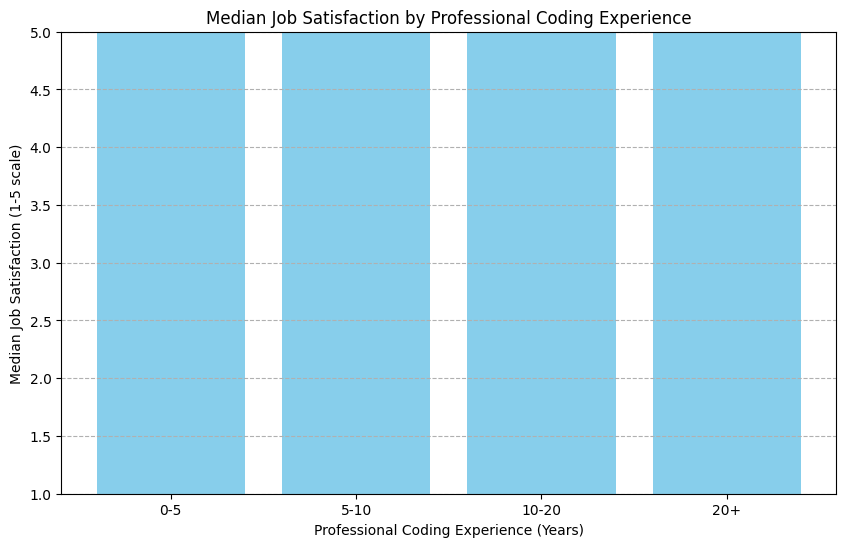

In [13]:
## Write your code here
import numpy as np

print(df['YearsCodePro'].describe())
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

bins = [0, 5, 10, 20, 100]
labels = ['0-5', '5-10', '10-20', '20+']
df['ExperienceRange'] = pd.cut(df['YearsCodePro'], bins=bins, labels=labels, right=False)

median_job_sat_by_range = df.groupby('ExperienceRange')['JobSat'].median().reset_index()
print("\nMedian Job Satisfaction by Experience Range:")
print(median_job_sat_by_range)

plt.figure(figsize=(10, 6))
plt.bar(median_job_sat_by_range['ExperienceRange'], median_job_sat_by_range['JobSat'], color='skyblue')
plt.xlabel('Professional Coding Experience (Years)')
plt.ylabel('Median Job Satisfaction (1-5 scale)')
plt.title('Median Job Satisfaction by Professional Coding Experience')
plt.ylim(1, 5) # Set y-axis limits to match the satisfaction scale
plt.grid(axis='y', linestyle='--')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


/tmp/ipykernel_300/2180480849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='JobSat', data=df, palette='viridis') # 'palette' for color scheme


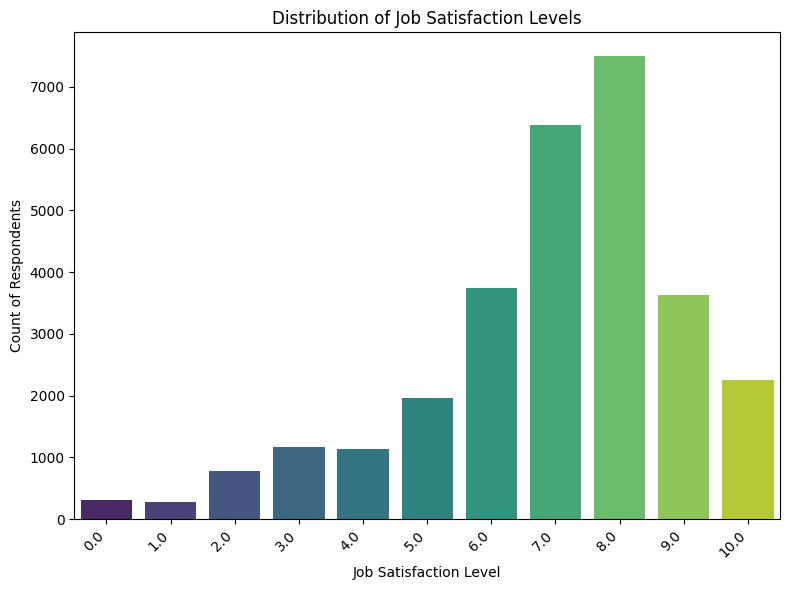

In [10]:
## Write your code here
plt.figure(figsize=(8, 6)) # Optional: Adjust figure size
sns.countplot(x='JobSat', data=df, palette='viridis') # 'palette' for color scheme

# Add labels and title
plt.title('Distribution of Job Satisfaction Levels')
plt.xlabel('Job Satisfaction Level')
plt.ylabel('Count of Respondents')

# Rotate x-axis labels if they are long or overlapping
plt.xticks(rotation=45, ha='right') 

# Display the plot
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


/tmp/ipykernel_300/1596687925.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_clean, x='RemoteWork', order=df_clean['RemoteWork'].value_counts().index, palette='coolwarm')


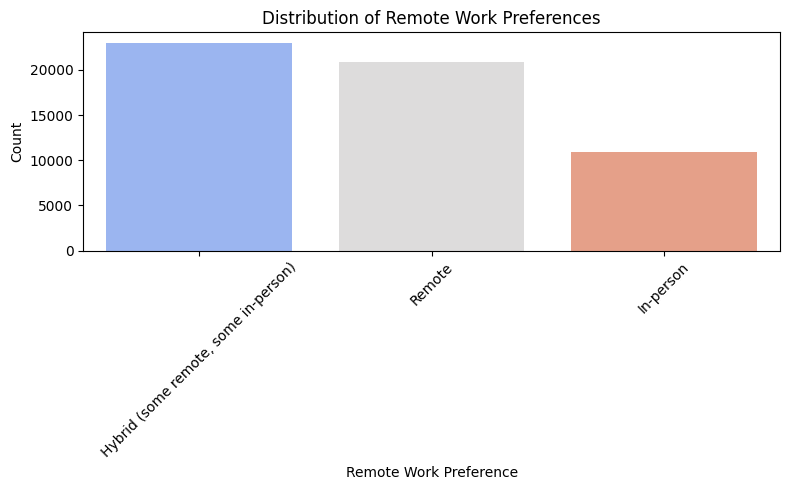

RemoteWork                                          Hybrid (some remote, some in-person)  \
Employment                                                                                 
Employed, full-time                                                             0.442807   
Employed, full-time;Employed, part-time                                         0.400943   
Employed, full-time;Independent contractor, fre...                              0.373911   
Employed, full-time;Independent contractor, fre...                              0.434783   
Employed, full-time;Independent contractor, fre...                              0.000000   

RemoteWork                                          In-person    Remote  
Employment                                                               
Employed, full-time                                  0.219136  0.338057  
Employed, full-time;Employed, part-time              0.150943  0.448113  
Employed, full-time;Independent contractor, fre...   0.1028

In [18]:
## Write your code here
df_clean = df.dropna(subset=['RemoteWork', 'Employment'])

# Step 3: Plot overall distribution of RemoteWork
plt.figure(figsize=(8, 5))
sns.countplot(data=df_clean, x='RemoteWork', order=df_clean['RemoteWork'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Remote Work Preferences')
plt.xlabel('Remote Work Preference')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Cross-tabulation by Employment type and Job Role
# Create a cross-tab (you can normalize it for percentage if needed)
crosstab = pd.crosstab(
    index=[df_clean['Employment']],
    columns=df_clean['RemoteWork'],
    normalize='index'  # This gives % per job role + employment combo
)

# Display top rows of cross-tab
print(crosstab.head())

#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


/tmp/ipykernel_300/1326462756.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')


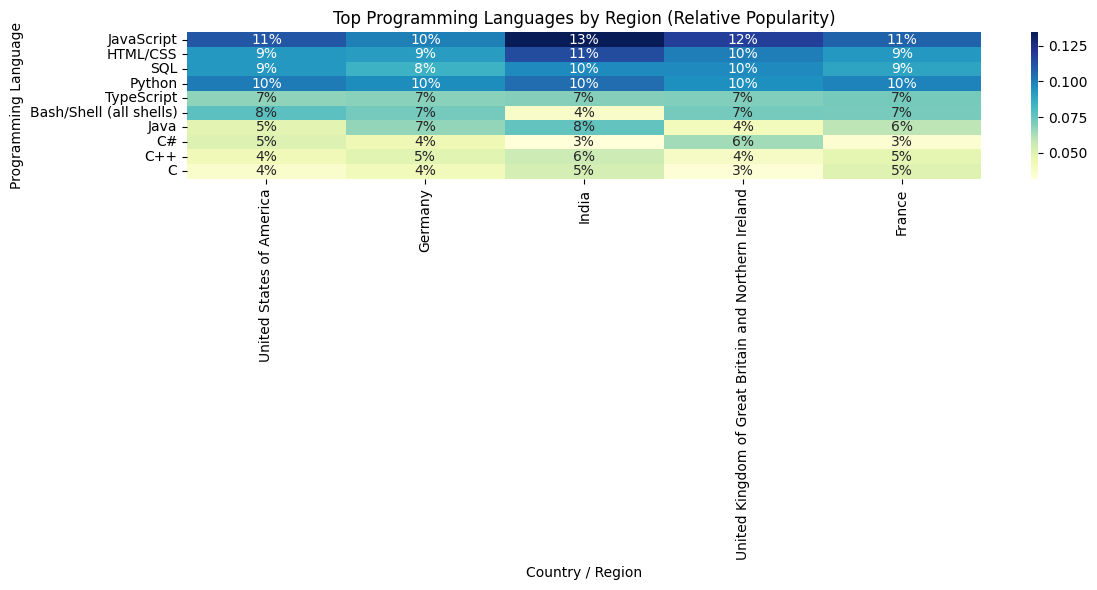

In [23]:
## Write your code here
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'Country'])

# Step 3: Explode language column
# Assume LanguageHaveWorkedWith is a semi-colon separated string
df_clean['LanguageHaveWorkedWith'] = df_clean['LanguageHaveWorkedWith'].str.split(';')

# Explode to long format: one language per row
df_clean = df_clean.explode('LanguageHaveWorkedWith')

# Step 4: Group by Country and Language, count usage
lang_counts = df_clean.groupby(['Country', 'LanguageHaveWorkedWith']).size().reset_index(name='Count')

# Optional: Normalize counts per country to get relative popularity
lang_counts_total = lang_counts.groupby('Country')['Count'].transform('sum')
lang_counts['Percent'] = lang_counts['Count'] / lang_counts_total

# Step 5: Pivot to create a heatmap-style table
lang_pivot = lang_counts.pivot(index='LanguageHaveWorkedWith', columns='Country', values='Percent').fillna(0)

# Optional: Filter top languages or top countries
top_languages = lang_counts.groupby('LanguageHaveWorkedWith')['Count'].sum().sort_values(ascending=False).head(10).index
top_countries = lang_counts.groupby('Country')['Count'].sum().sort_values(ascending=False).head(5).index

lang_pivot_filtered = lang_pivot.loc[top_languages, top_countries]

# Step 6: Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(lang_pivot_filtered, annot=True, fmt='.0%', cmap='YlGnBu')
plt.title('Top Programming Languages by Region (Relative Popularity)')
plt.xlabel('Country / Region')
plt.ylabel('Programming Language')
plt.tight_layout()
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


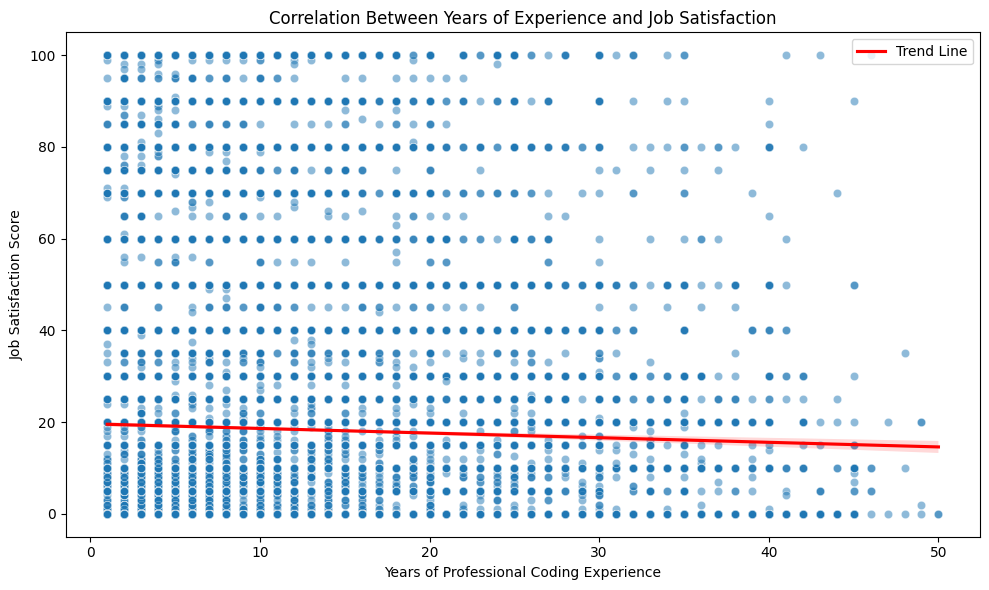

In [20]:
## Write your code here
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df['JobSatPoints_1'] = pd.to_numeric(df['JobSatPoints_1'], errors='coerce')

# Step 3: Drop rows with missing or invalid values
df_clean = df.dropna(subset=['YearsCodePro', 'JobSatPoints_1'])

# Step 4: Plot scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='YearsCodePro', y='JobSatPoints_1', alpha=0.5)
sns.regplot(data=df_clean, x='YearsCodePro', y='JobSatPoints_1', scatter=False, color='red', label='Trend Line')

plt.title('Correlation Between Years of Experience and Job Satisfaction')
plt.xlabel('Years of Professional Coding Experience')
plt.ylabel('Job Satisfaction Score')
plt.legend()
plt.tight_layout()
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


/tmp/ipykernel_300/3788368121.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


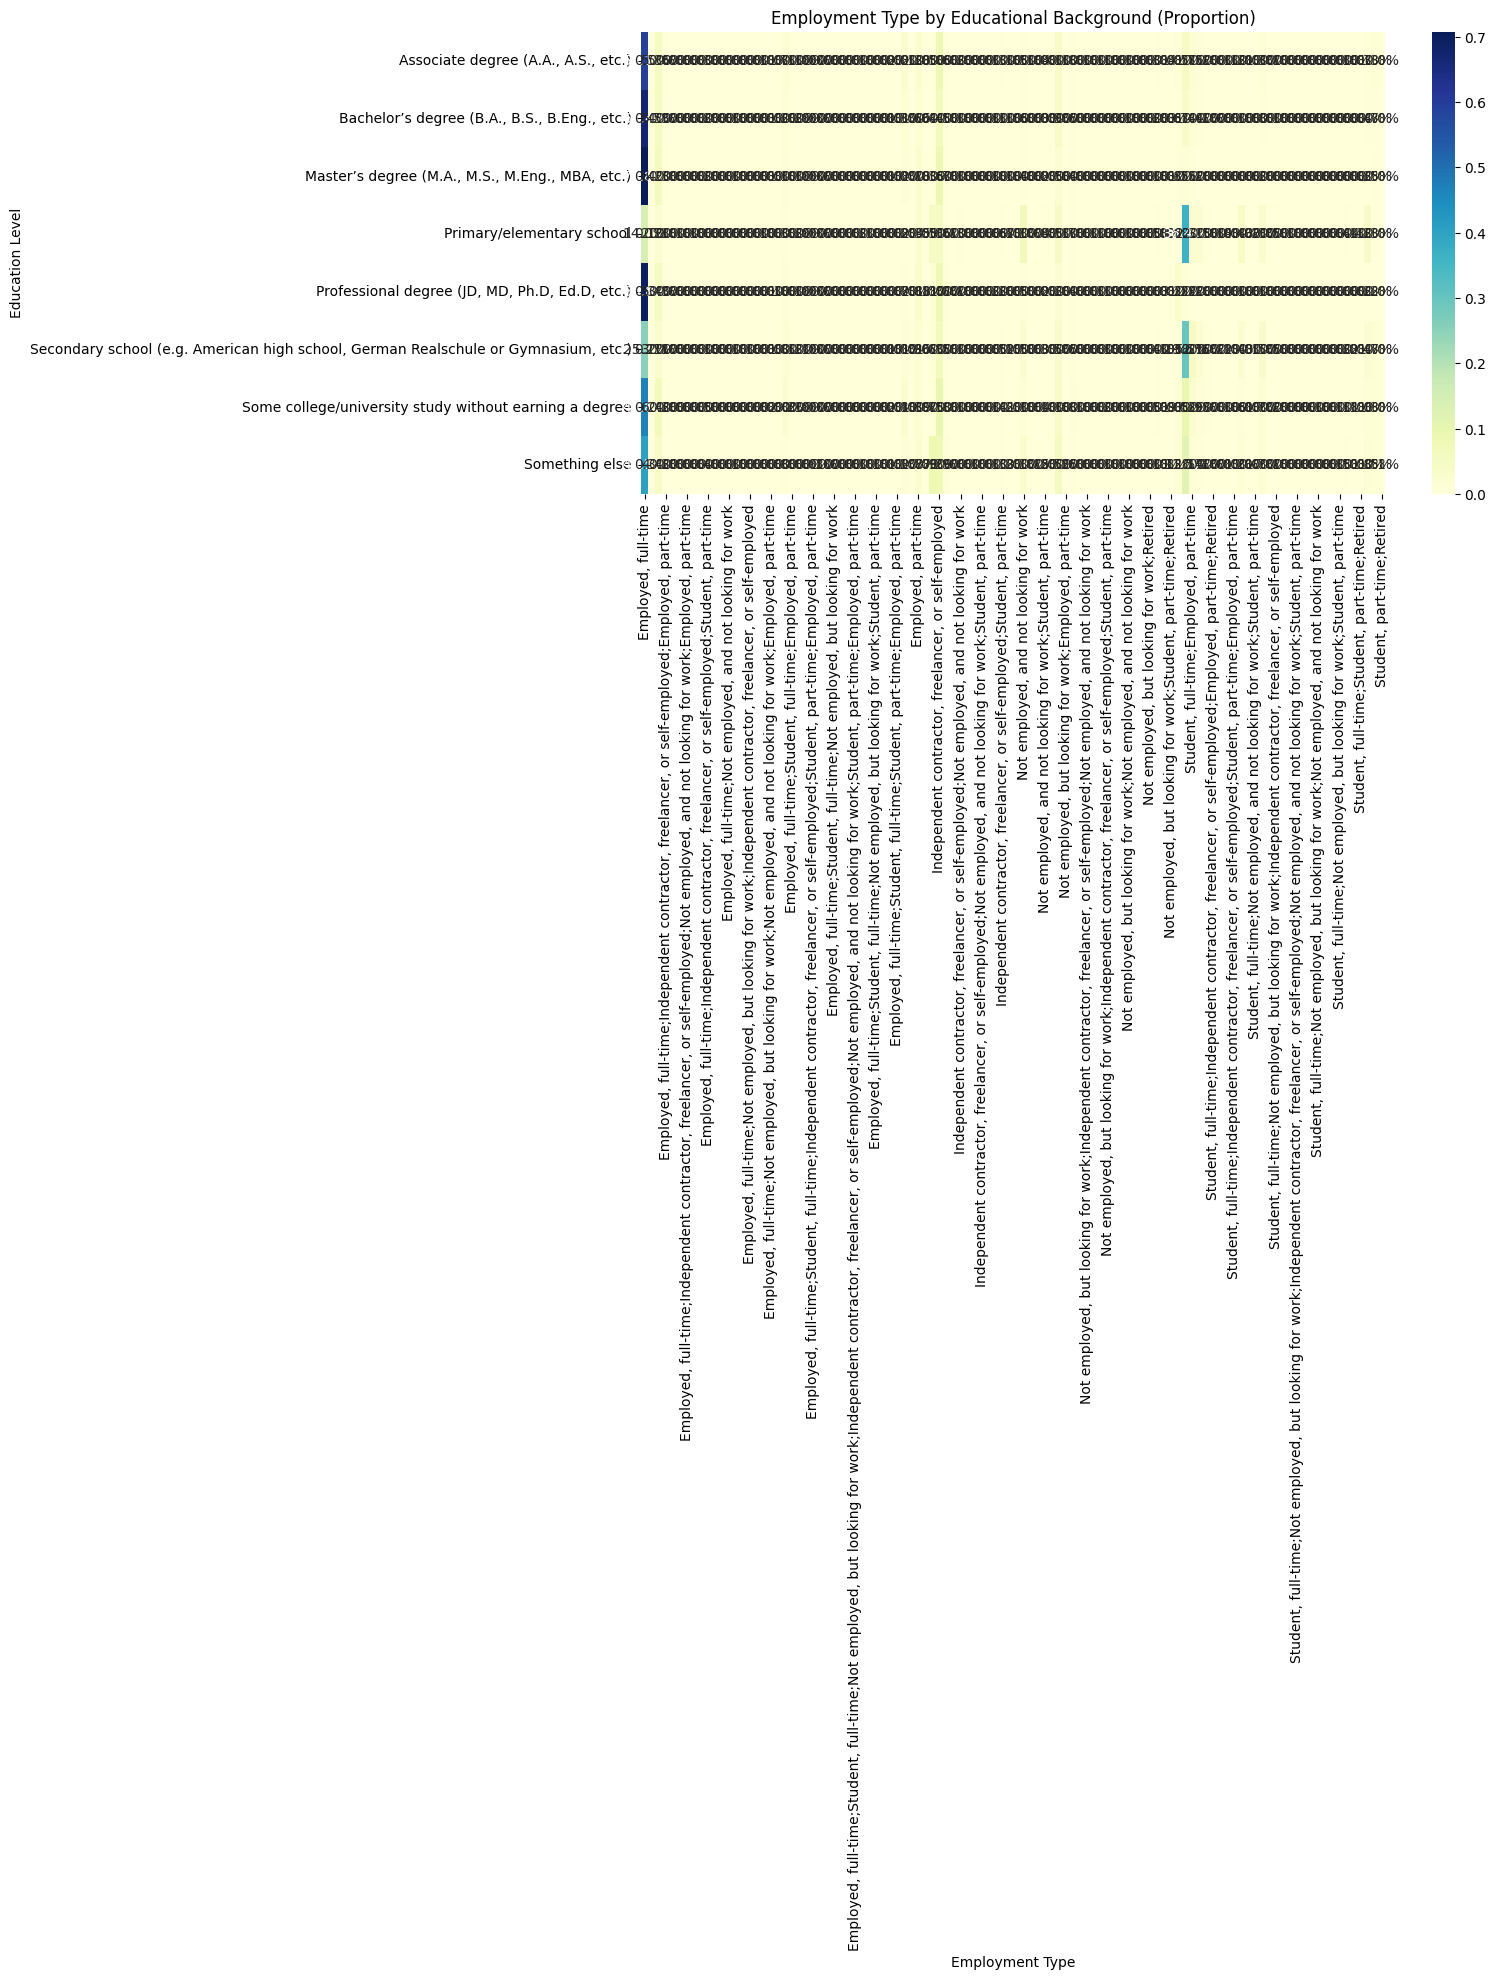

In [21]:
## Write your code here
df_clean = df.dropna(subset=['EdLevel', 'Employment'])
crosstab = pd.crosstab(df_clean['EdLevel'], df_clean['Employment'], normalize='index')

# Step 4: Heatmap to visualize
plt.figure(figsize=(12, 6))
sns.heatmap(crosstab, annot=True, fmt='.1%', cmap='YlGnBu')
plt.title('Employment Type by Educational Background (Proportion)')
plt.xlabel('Employment Type')
plt.ylabel('Education Level')
plt.tight_layout()
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df_clean.to_csv("survey_data.csv")

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
